In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

train_df = train_df = pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e21/sample_submission.csv")

In [2]:
pd.set_option('display.max_columns',None)
train_df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


Data description:
Indicators of river water quality in this dataset are:

Dissolved oxygen (O2) is measured in mgO2/cub. dm (ie milligrams of oxygen (O2) in the cubic decimeter);

Ammonium ions (NH4) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

Nitrite ions (NO2) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

Nitrate ions (NO3) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

Biochemical oxygen demand, which is determined in 5 days ("BOD5" or "BOD"). BOD5 is measured in mgO/cub. dm (ie milligrams of oxygen in the cubic decimeter).

The minimum permissible value of O2 in Ukraine is 4 mgO2/cub. dm.

Id - the unique id of a given monthly averaged data;

target - a values of monthly averaged data of O2 in target station, mgO2/cub. dm;

1-7 - a values of monthly averaged data in stations 1-7 (in seven stations located from the target station upstream)

In [3]:
train_df.isnull().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [4]:
train_df.dtypes

id          int64
target    float64
O2_1      float64
O2_2      float64
O2_3      float64
O2_4      float64
O2_5      float64
O2_6      float64
O2_7      float64
NH4_1     float64
NH4_2     float64
NH4_3     float64
NH4_4     float64
NH4_5     float64
NH4_6     float64
NH4_7     float64
NO2_1     float64
NO2_2     float64
NO2_3     float64
NO2_4     float64
NO2_5     float64
NO2_6     float64
NO2_7     float64
NO3_1     float64
NO3_2     float64
NO3_3     float64
NO3_4     float64
NO3_5     float64
NO3_6     float64
NO3_7     float64
BOD5_1    float64
BOD5_2    float64
BOD5_3    float64
BOD5_4    float64
BOD5_5    float64
BOD5_6    float64
BOD5_7    float64
dtype: object

In [5]:
train_df.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,1.036098,7.074487,14.709377,0.466592,0.540403,0.08223,0.113137,0.097065,0.724153,1.190117,0.065045,0.230348,1.944999,2.184933,4.351799,10.866664,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,0.595943,5.279023,51.402198,0.311071,0.288486,0.10647,0.198144,0.082717,0.352611,0.634958,0.075737,0.213995,1.691173,1.496552,4.329417,6.003792,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.00000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.03800,0.040000,0.040000,0.560000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.05800,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,1.640000,10.090000,16.645000,0.429000,0.440000,0.07500,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.600000,4.960000,16.925000,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,3026.000000,2.680000,2.600000,0.95000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


We have only numeric data and none of the values is missing.
There are seven stations, the eighth one is the one for which target is computed. The amount of dissolved O2 is to be computed in the eighth station, so it seems that features NO2, NO3, BOD, NH4 contribute to their O2 values, so let's check how these individual targets and features correlate with each other.

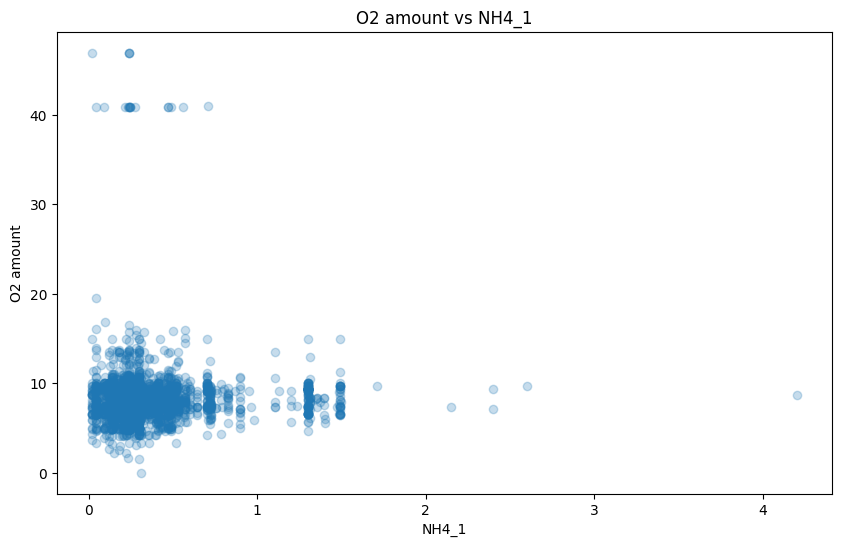

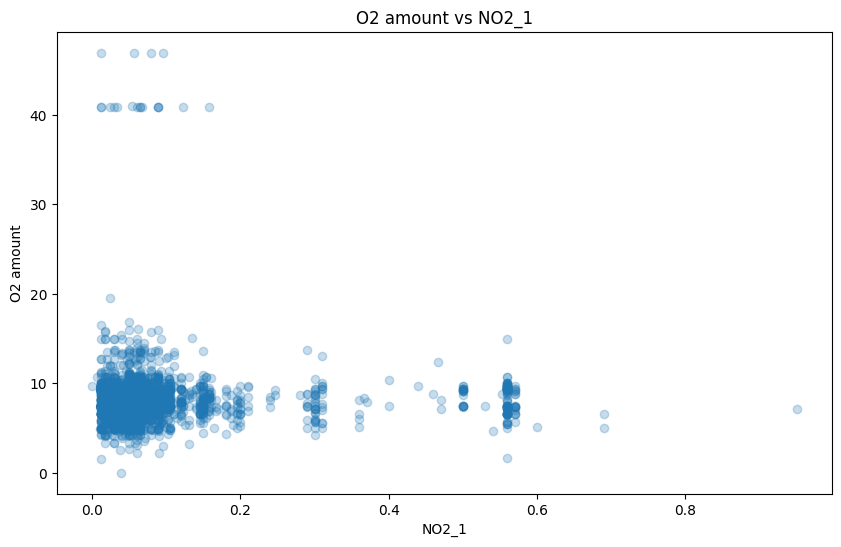

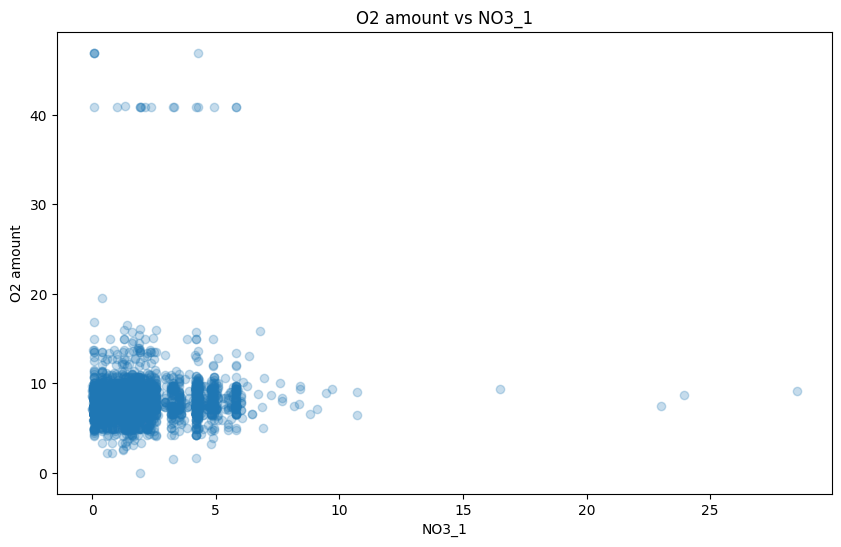

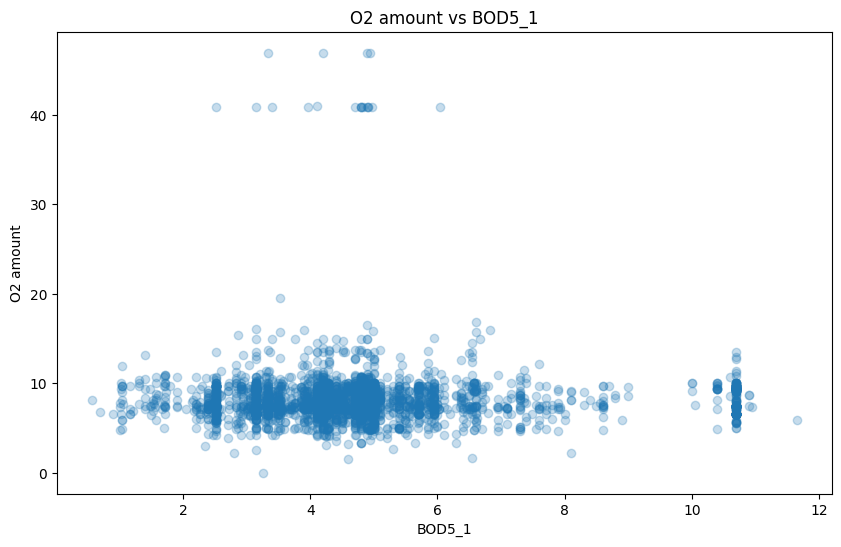

In [6]:
s1=['NH4_1','NO2_1','NO3_1','BOD5_1']
s2=['NH4_2','NO2_2','NO3_2','BOD5_2']
s3=['NH4_3','NO2_3','NO3_3','BOD5_3']
s4=['NH4_4','NO2_4','NO3_4','BOD5_4']


for f in s1:
    plt.figure(figsize=(10,6))
    plt.scatter(train_df[f],train_df['O2_1'],alpha=0.25)
    plt.xlabel(f)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f))
    plt.show

It seems there is no linear relationship between O2 amounts and the features. For sure we have somt outliers, but in general most of O2 values lie within 50% of each feature's instances. However, O2 values can be the same for different values of BOD5.

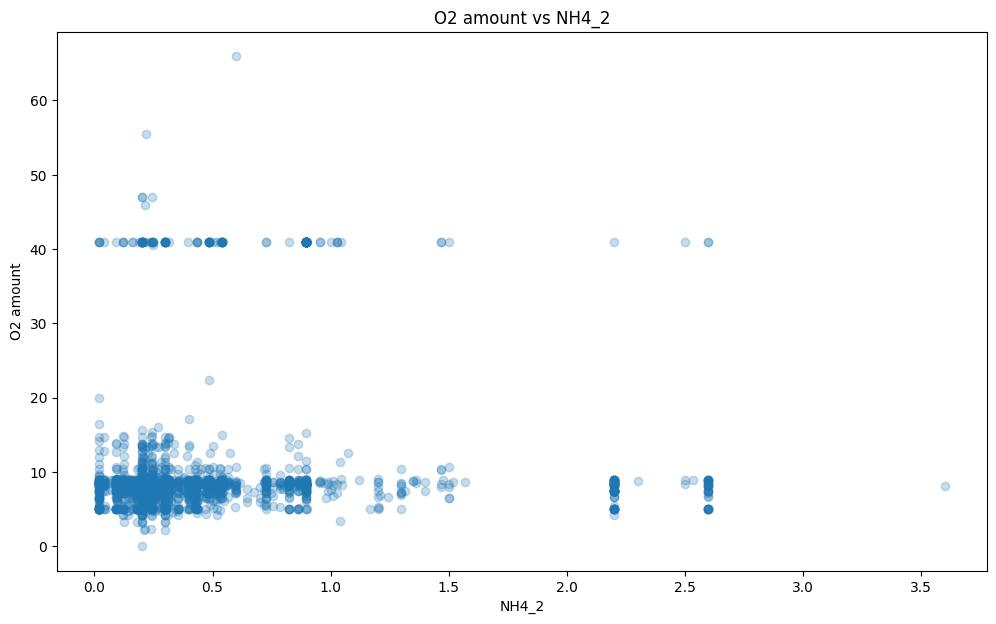

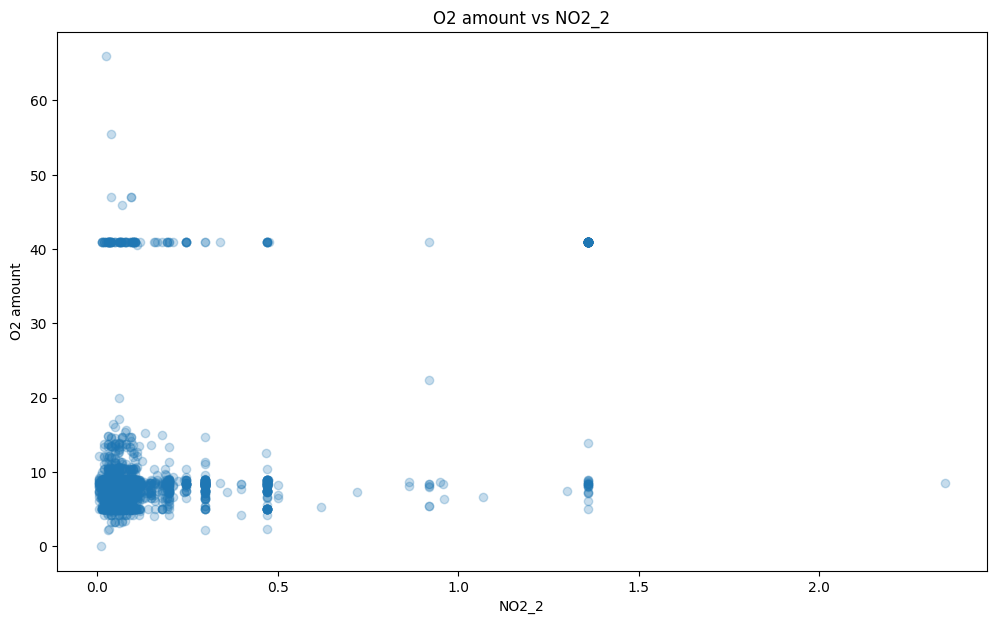

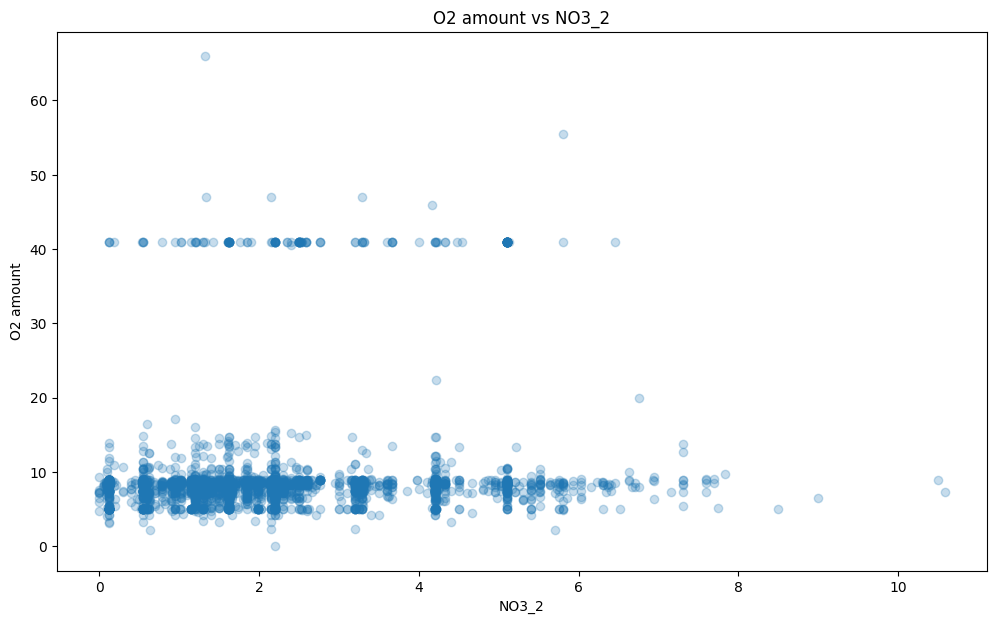

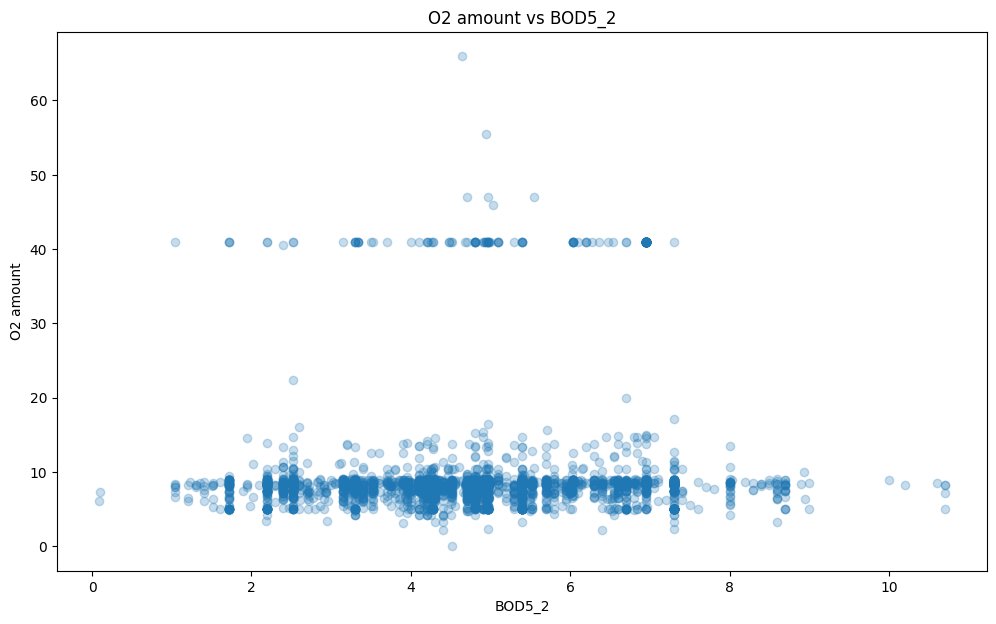

In [7]:
for f2 in s2:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f2],train_df['O2_2'],alpha=0.25)
    plt.xlabel(f2)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f2))
    plt.show

It seems there is no linear relationship between O2 amounts and the features. We have more outliers than in station 1, but in general most of O2 values lie within 50% of each feature's instances. However, O2 values can be the same for different values of BOD5 and NO3.

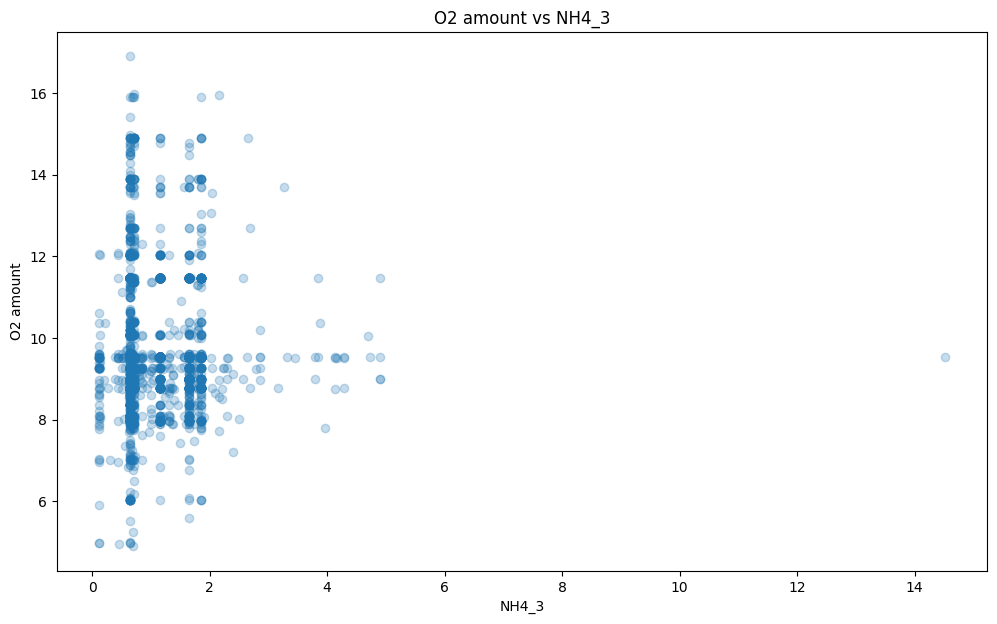

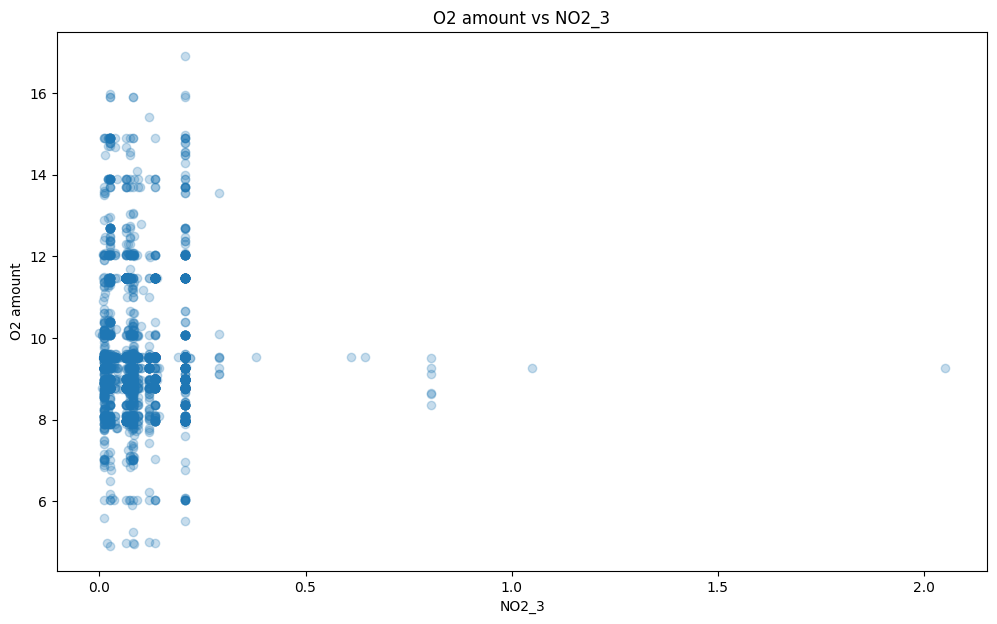

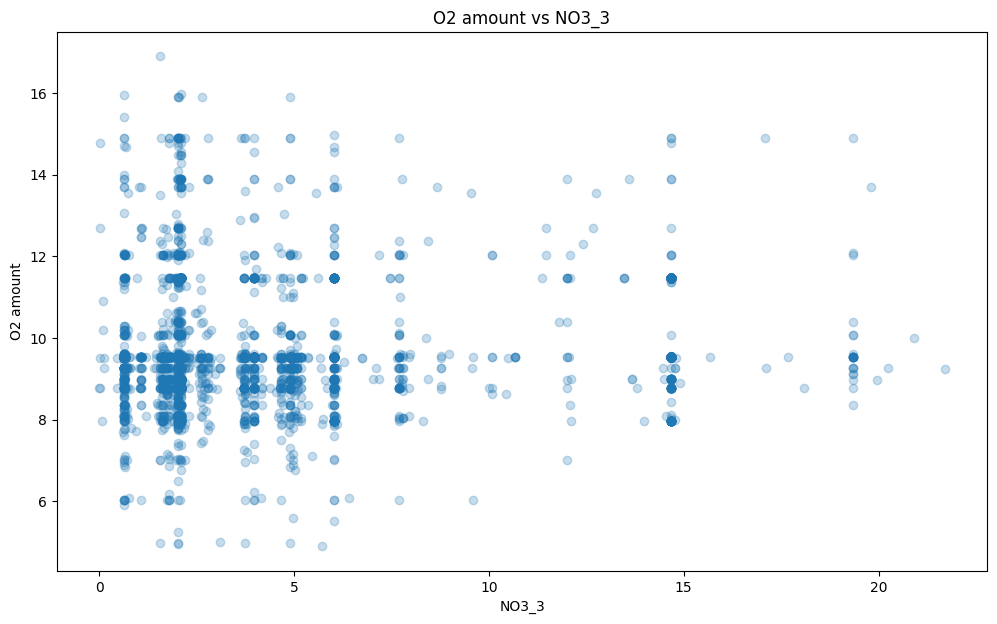

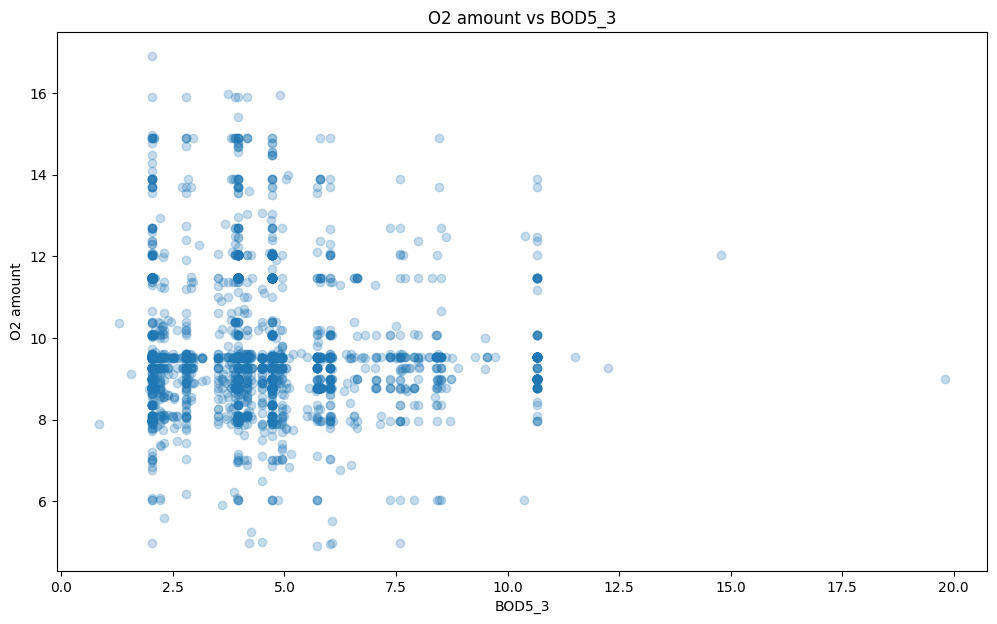

In [8]:
for f3 in s3:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f3],train_df['O2_3'],alpha=0.25)
    plt.xlabel(f3)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f3))
    plt.show

In this case, we can see that the O2 amounts are of higher range. Some high values are occur only with certain values of NH4, NO3, BOD5, NO2. We have some outliers too, but they are more diverse than in fore previous stations.

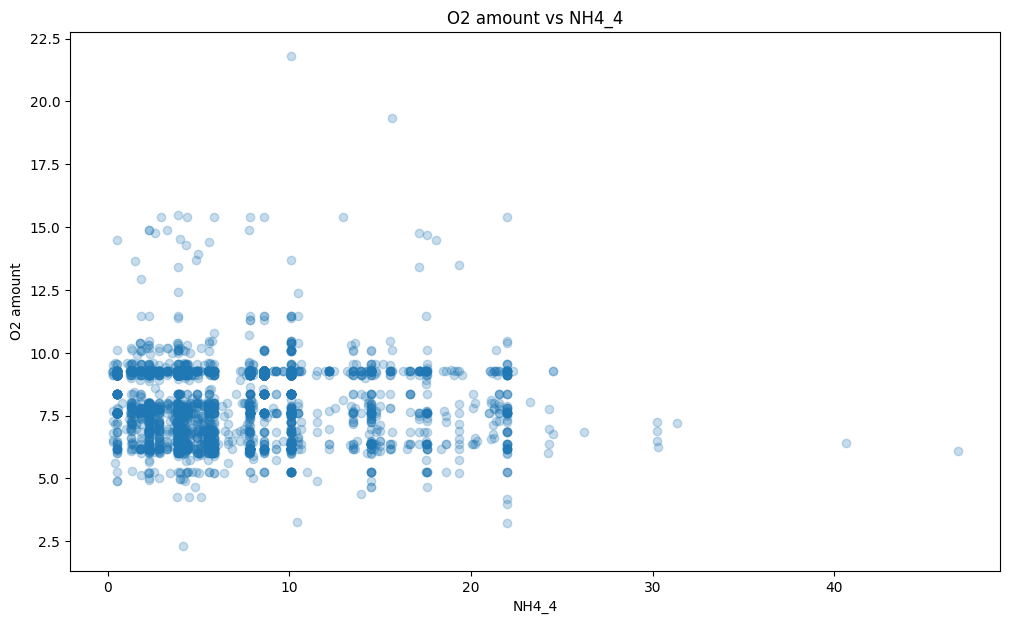

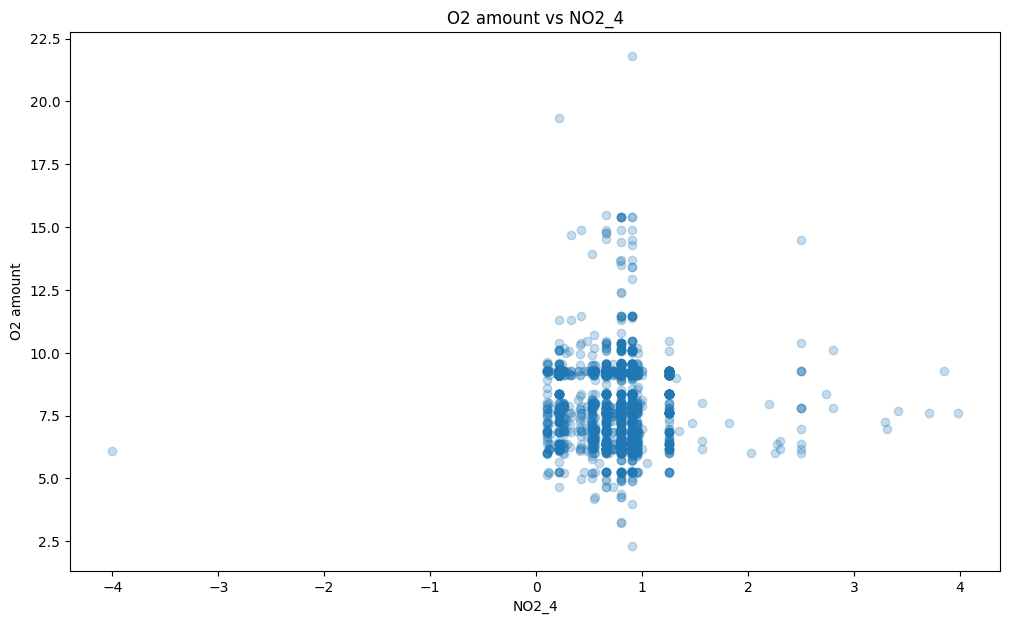

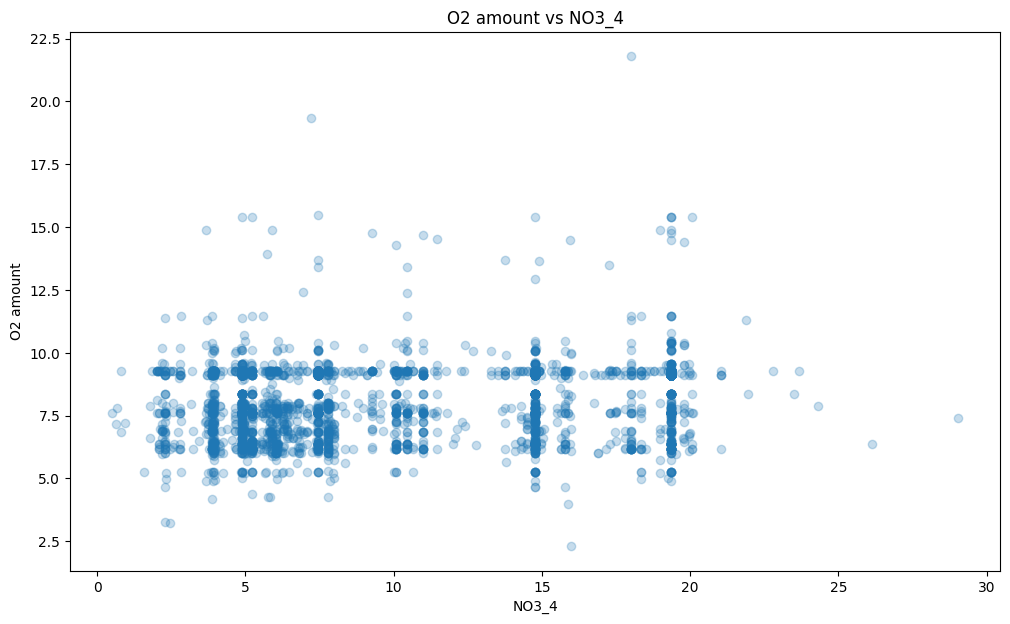

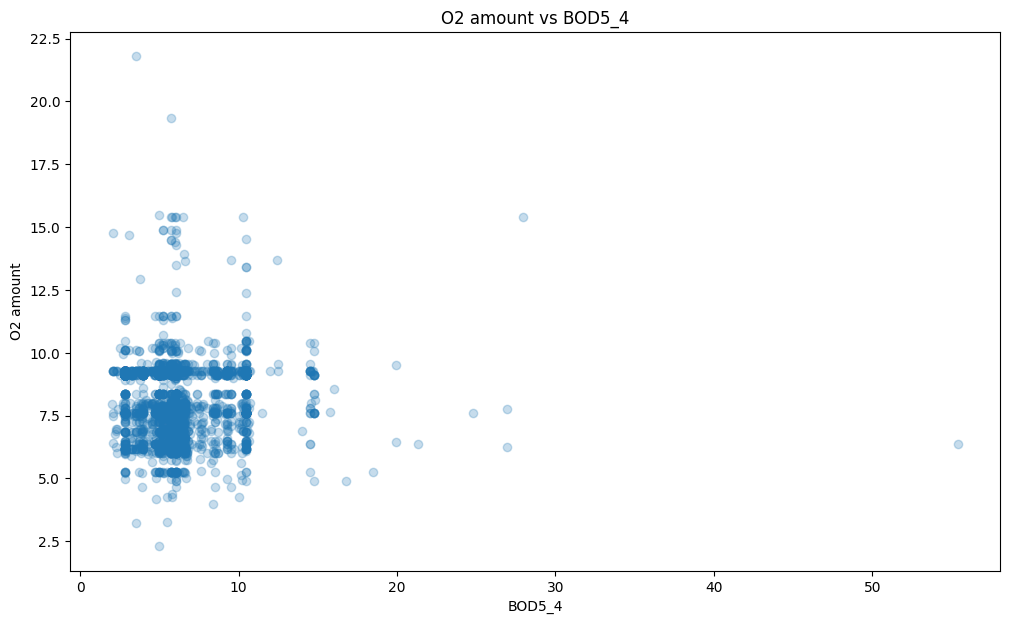

In [9]:
for f4 in s4:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f4],train_df['O2_4'],alpha=0.25)
    plt.xlabel(f4)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f4))
    plt.show

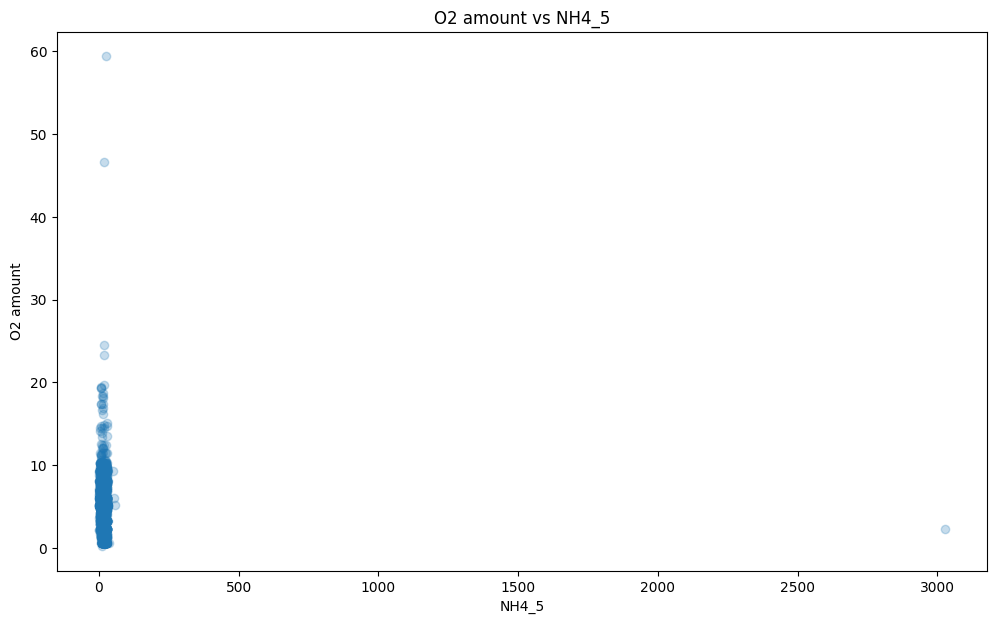

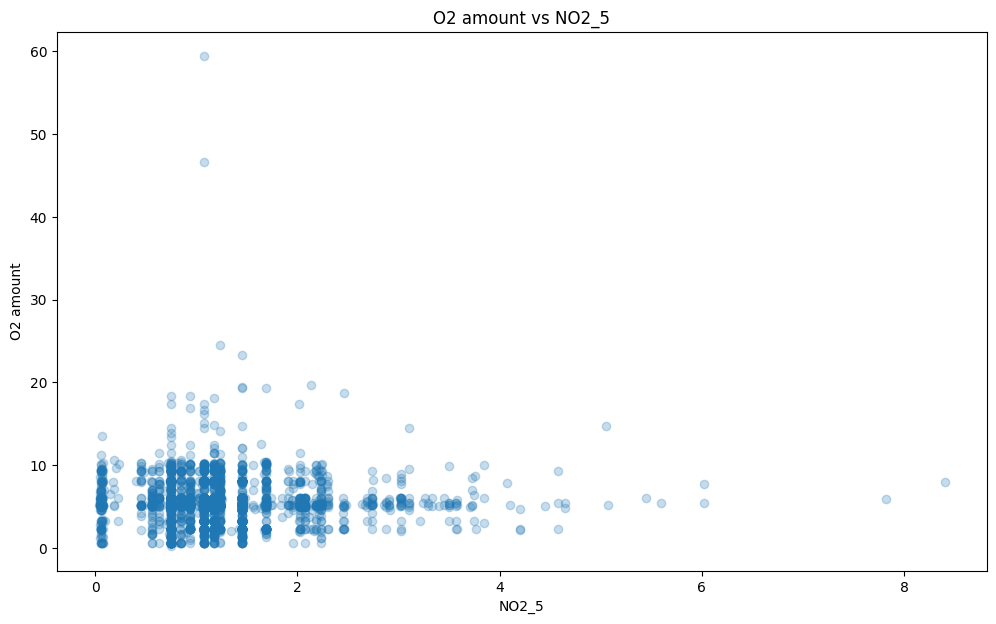

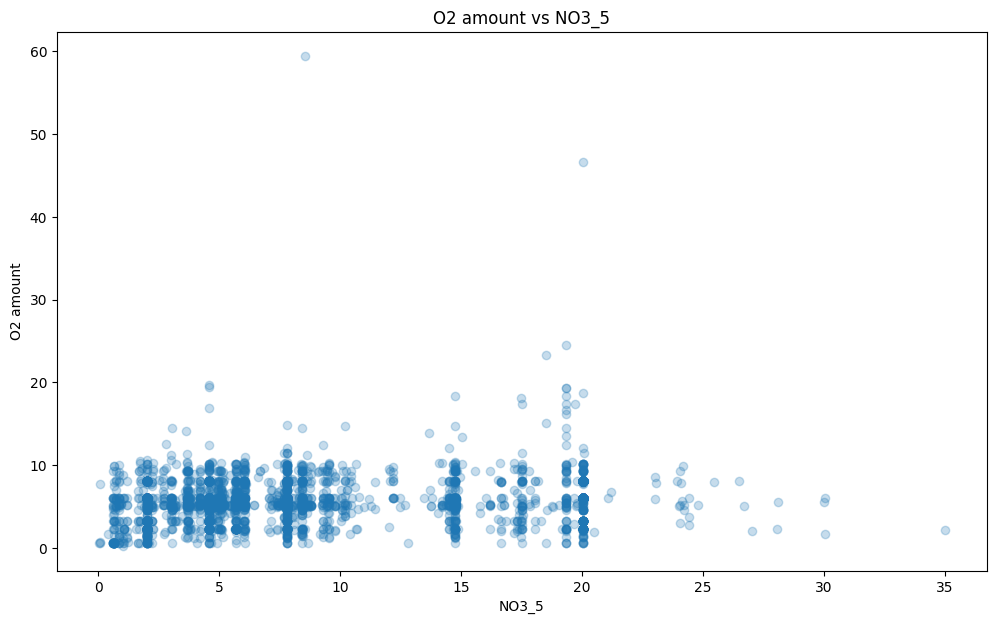

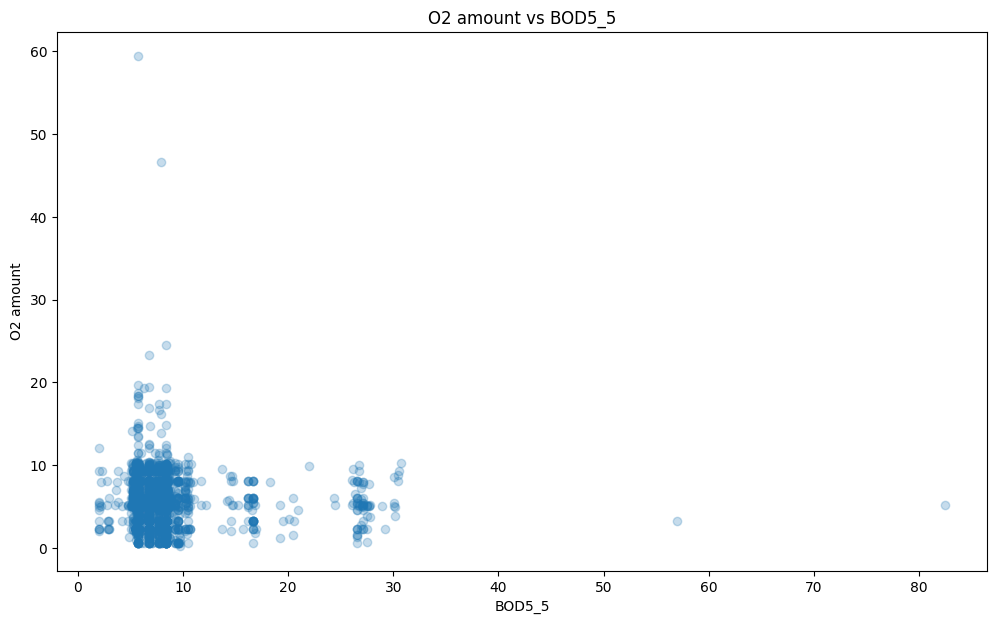

In [10]:
s5=['NH4_5','NO2_5','NO3_5','BOD5_5']
s6=['NH4_6','NO2_6','NO3_6','BOD5_6']
s7=['NH4_7','NO2_7','NO3_7','BOD5_7']

for f5 in s5:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f5],train_df['O2_5'],alpha=0.25)
    plt.xlabel(f5)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f5))
    plt.show

For station 5 the observations are similar, when it comes to NO3 values. However, we can see more concentration of instances when it comes to BOD5 and NH4 values. NO2-related amounts of O2 have some concentration points but also many instances with the values of O2 but different values of NO2.

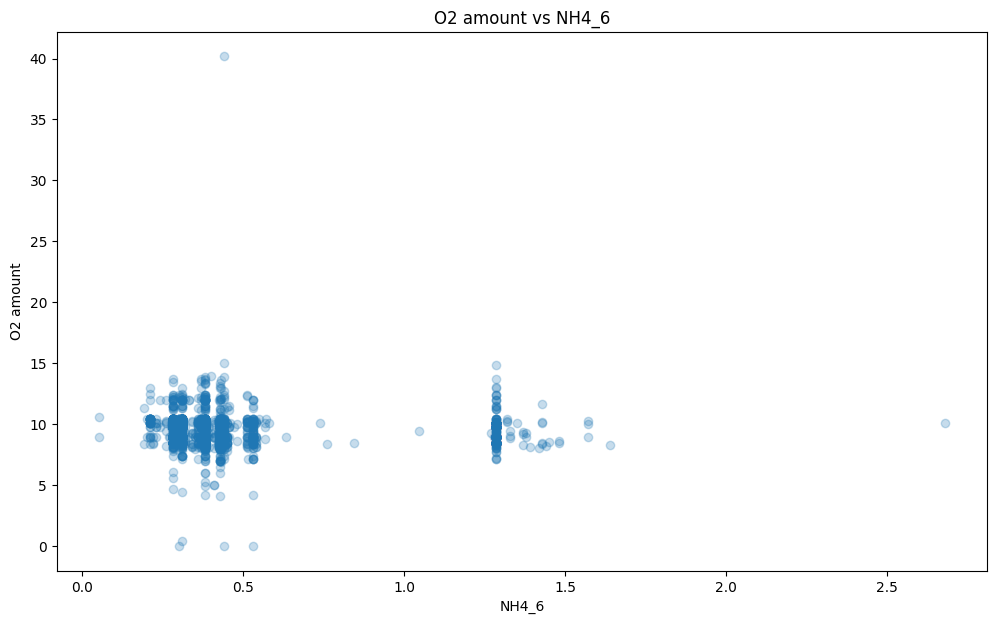

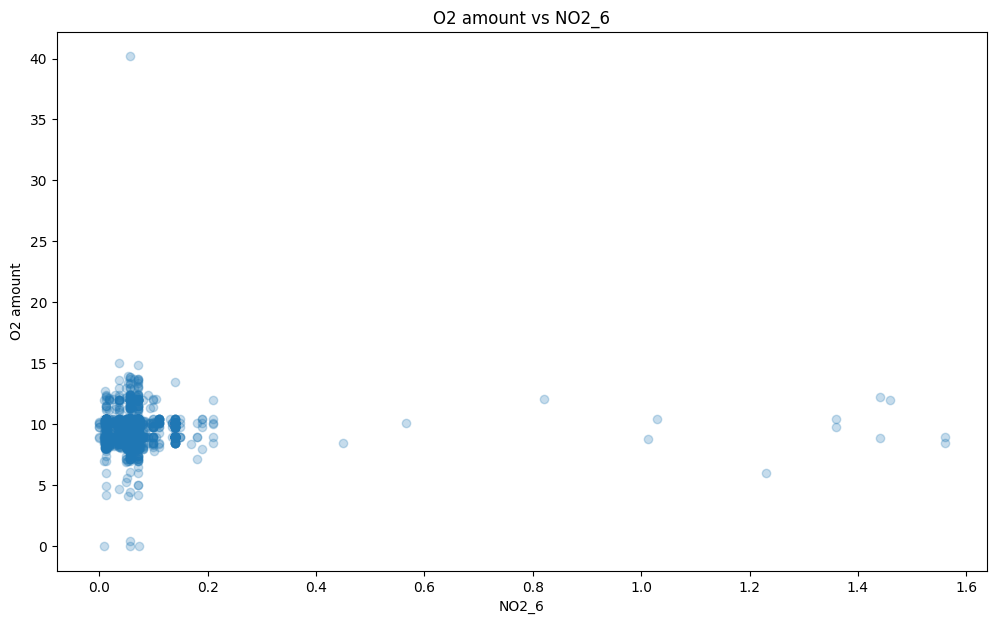

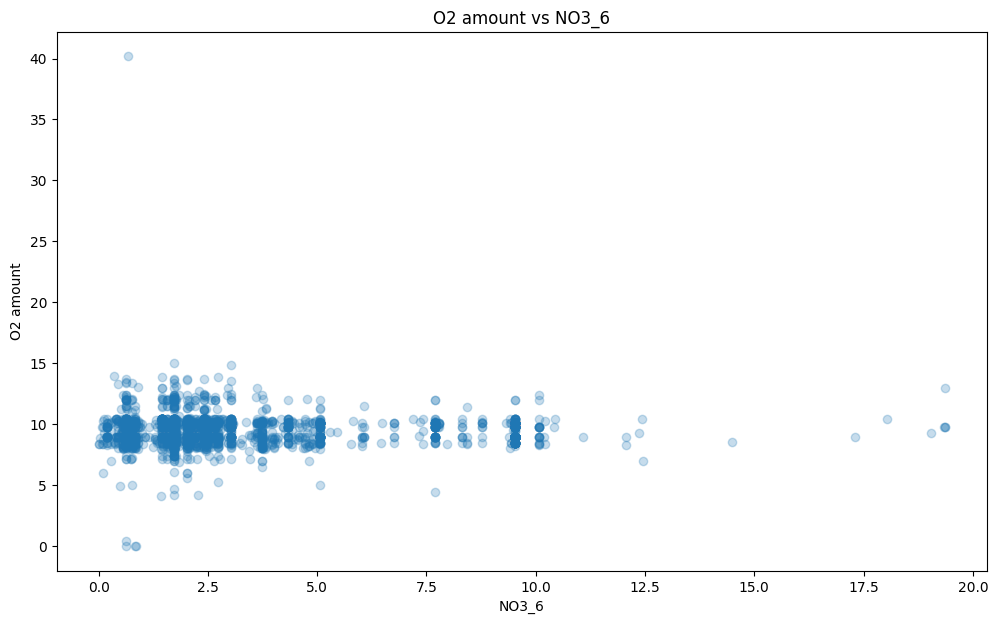

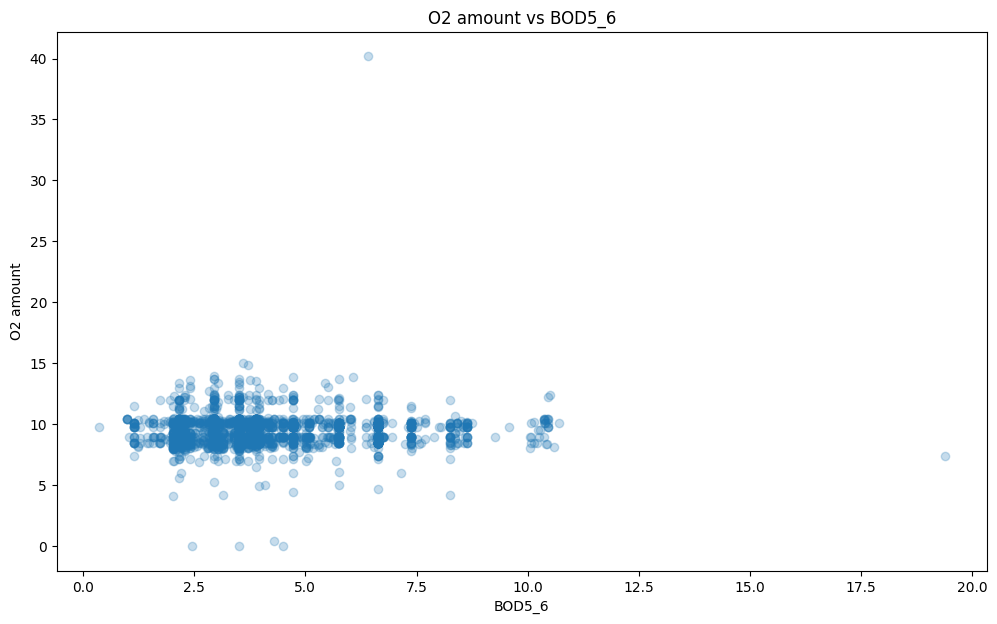

In [11]:
for f6 in s6:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f6],train_df['O2_6'],alpha=0.25)
    plt.xlabel(f6)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f6))
    plt.show

BOD5 and NO3 features can have different values for the same amount of O2, which is similar to the observances in other stations. Yet, here there is great concentration for NO2 and O2 and two concentrations for NH4 and O2, which is rather new when compared to other stations.

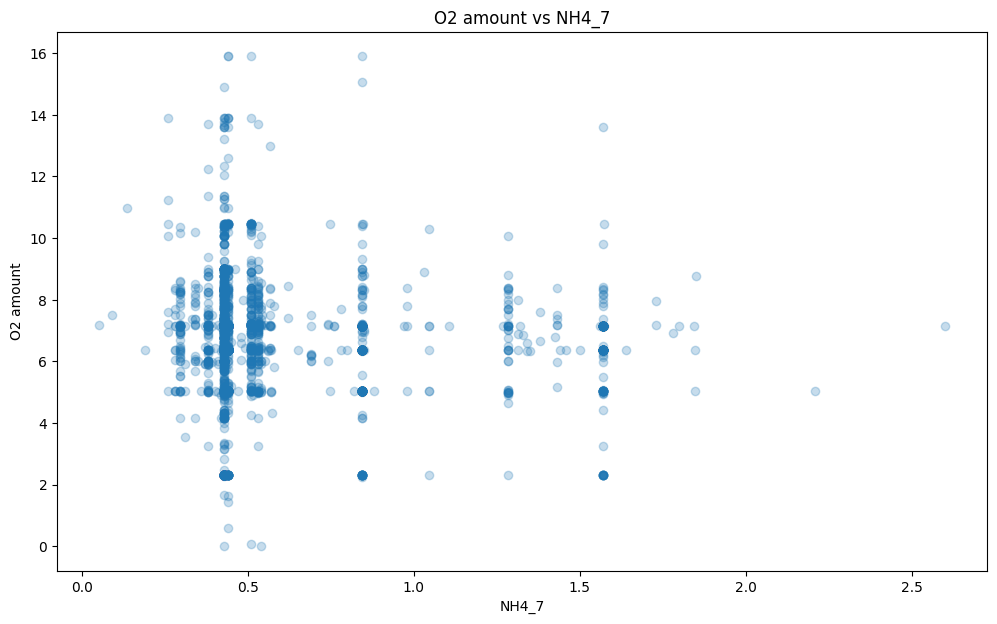

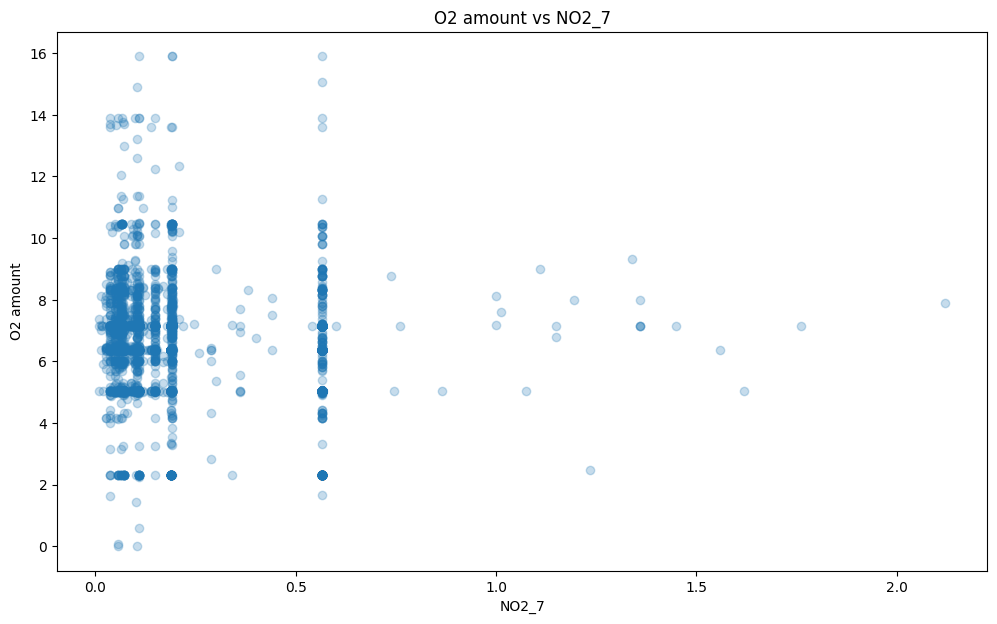

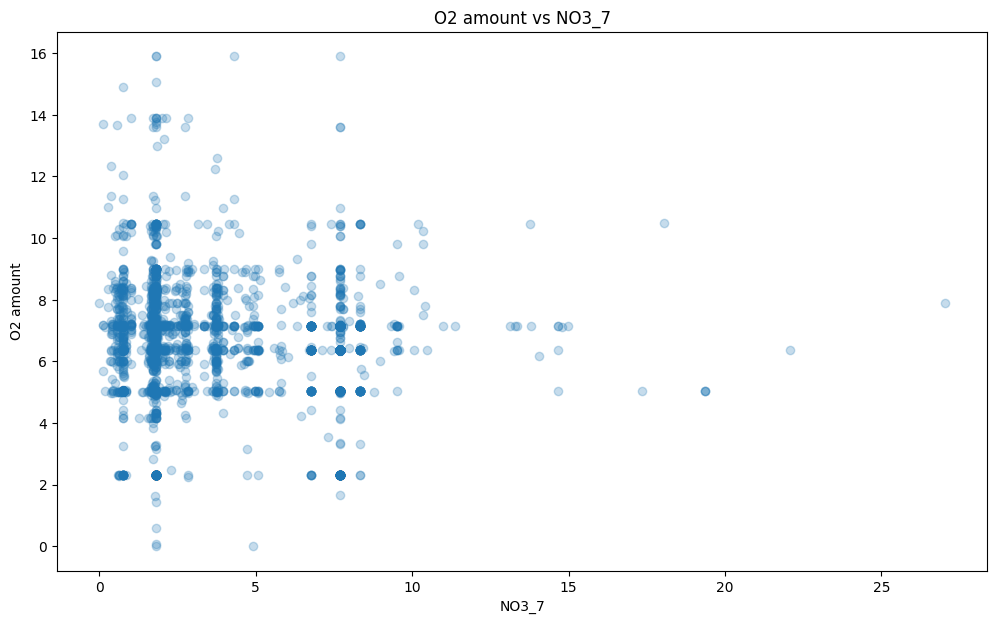

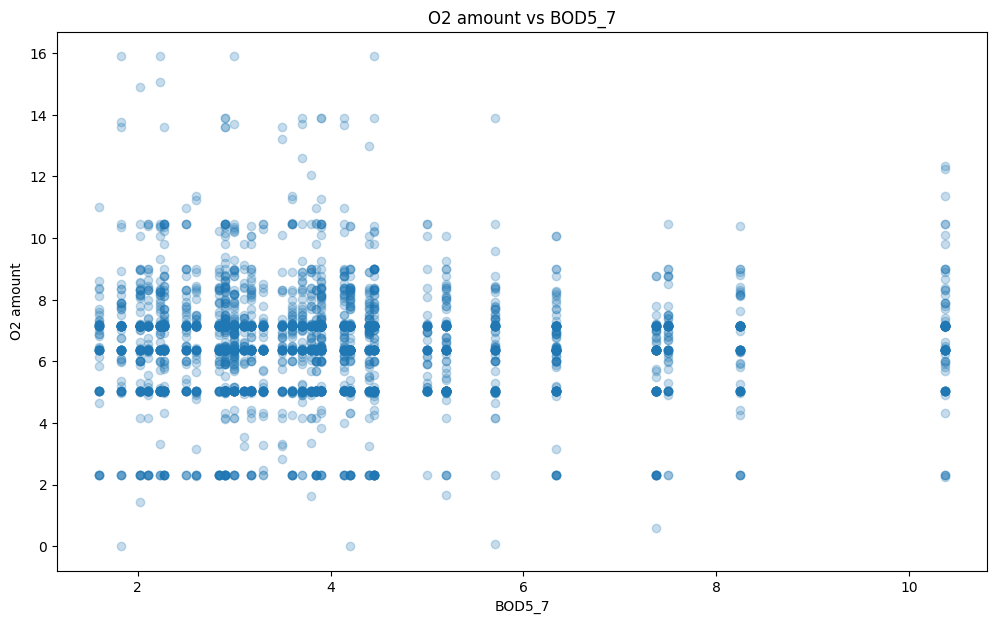

In [12]:
for f7 in s7:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[f7],train_df['O2_7'],alpha=0.25)
    plt.xlabel(f7)
    plt.ylabel('O2 amount')
    plt.title('O2 amount vs {}'.format(f7))
    plt.show

In the last set, the O2 values vs. BOD5 have some concentration points but a higher range of values. NO3 have some concentration points too, but also more values of different range. NO2 and NH4 vs. O2 - here we have some concentration points and greater range of O2 values.

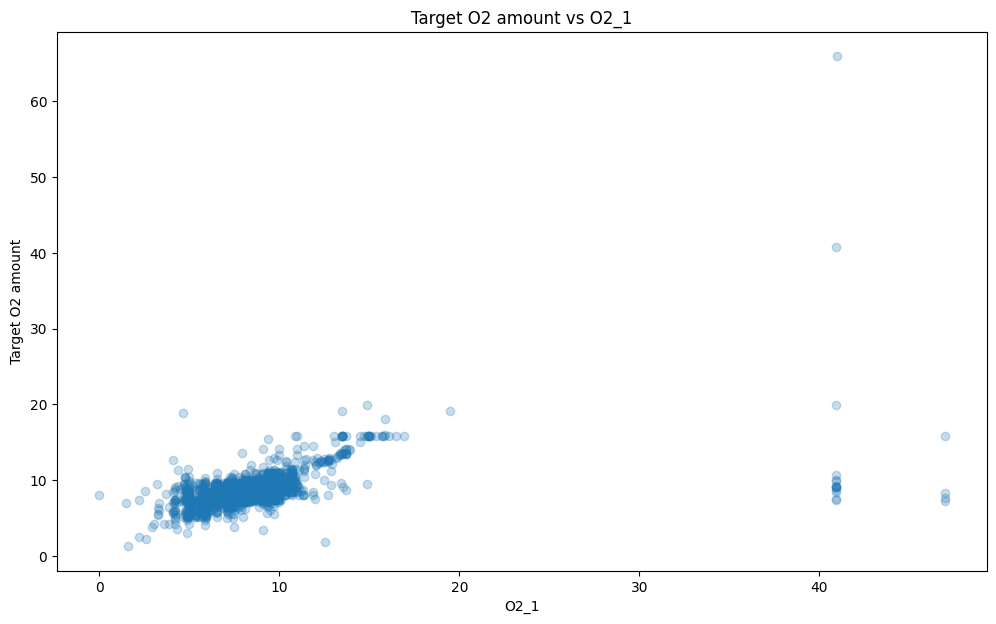

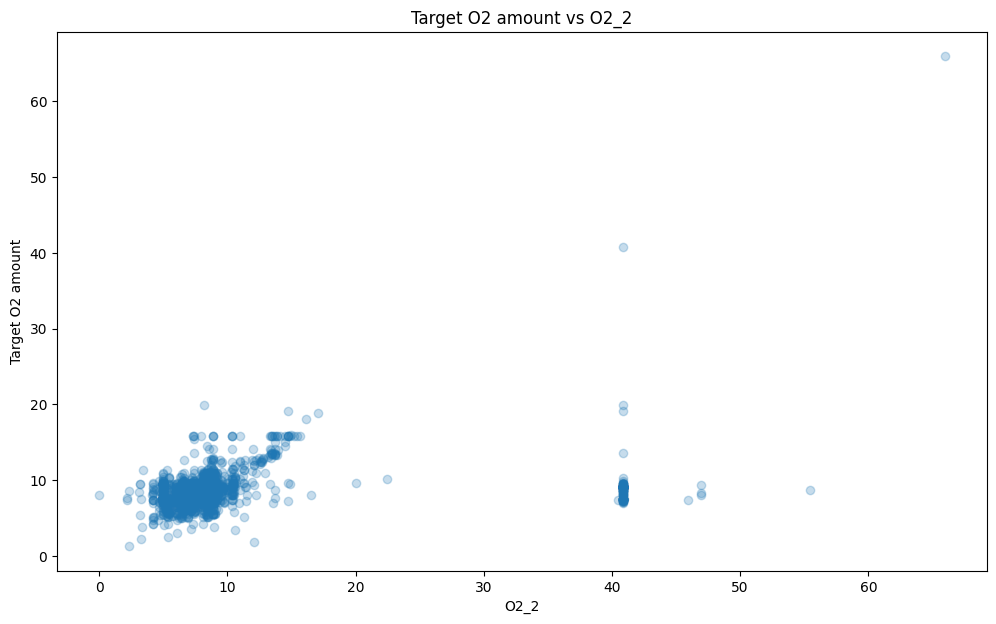

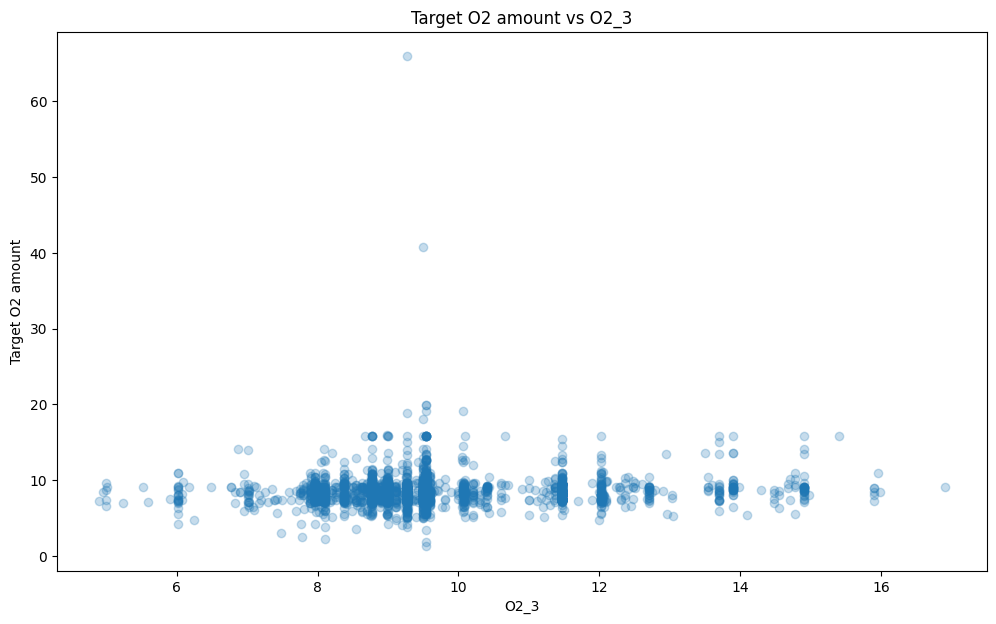

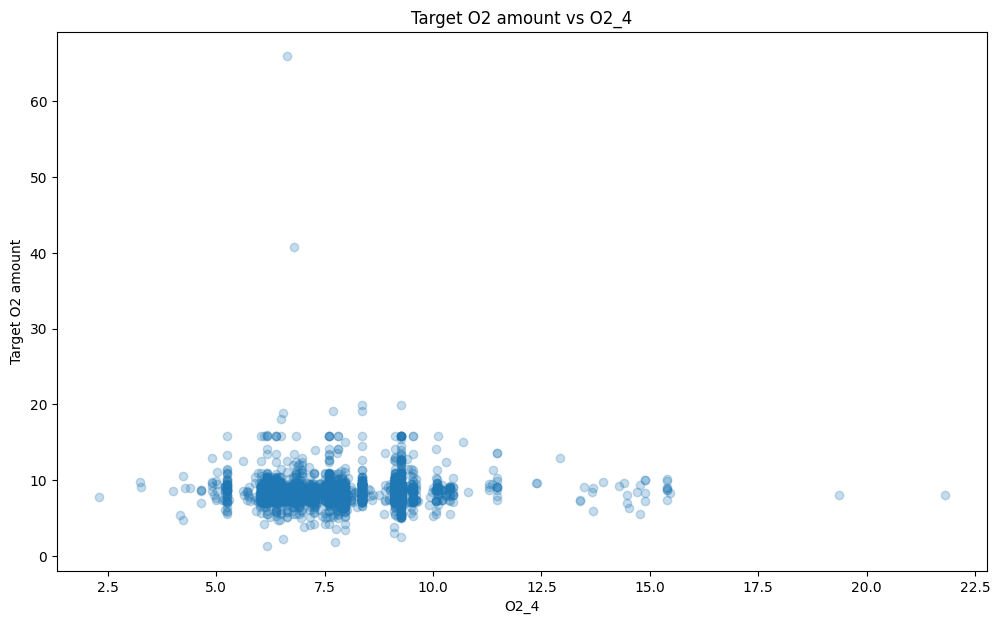

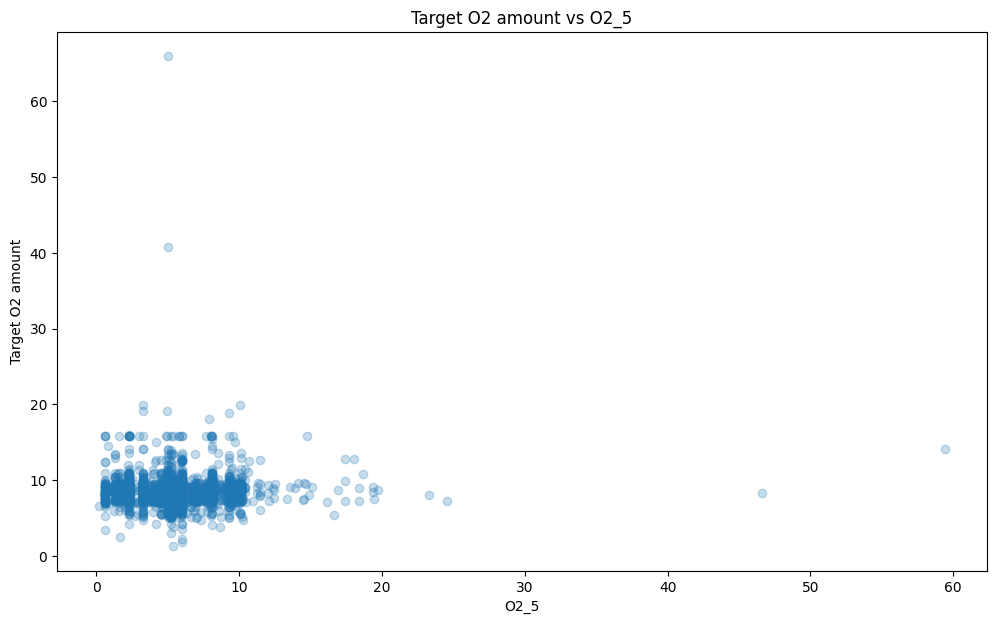

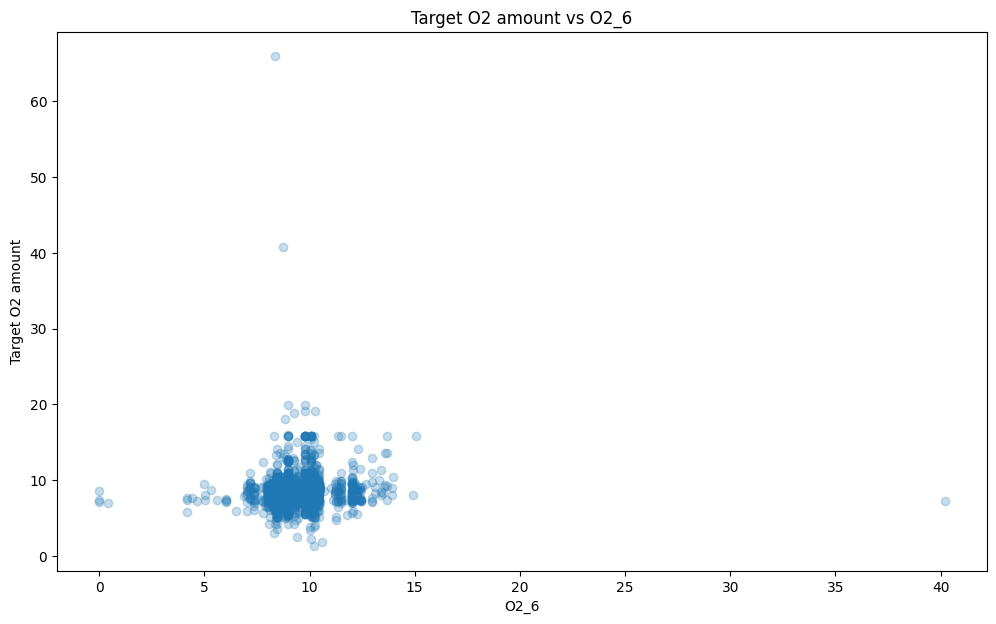

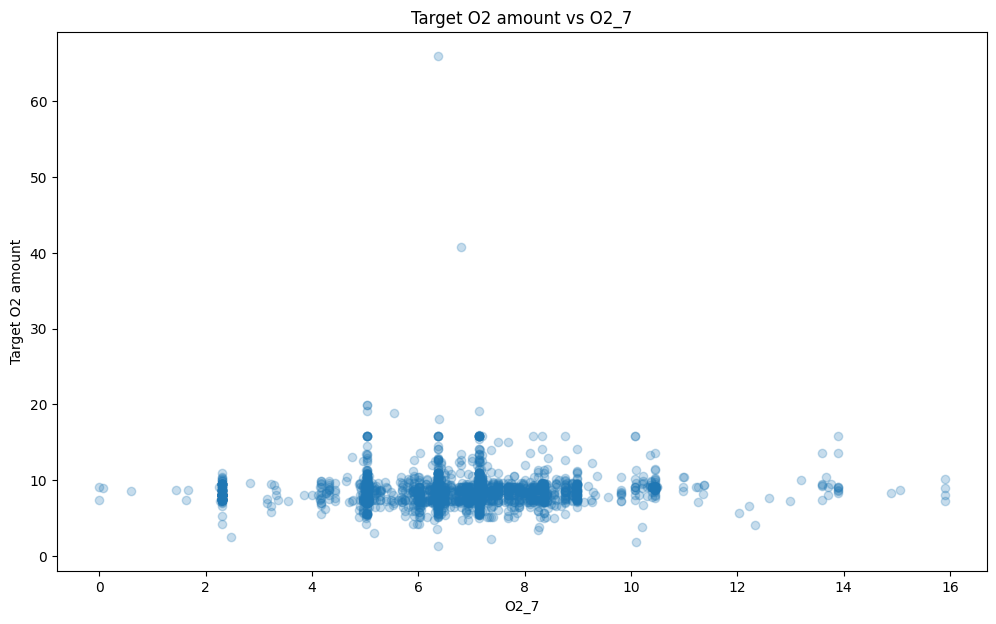

In [13]:
O2=['O2_1','O2_2','O2_3','O2_4','O2_5','O2_6','O2_7']
for o in O2:
    plt.figure(figsize=(12,7))
    plt.scatter(train_df[o],train_df['target'],alpha=0.25)
    plt.xlabel(o)
    plt.ylabel('Target O2 amount')
    plt.title('Target O2 amount vs {}'.format(o))
    plt.show

It seems that the O2_1 and O2_2 values have the biggest impact on the target.

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


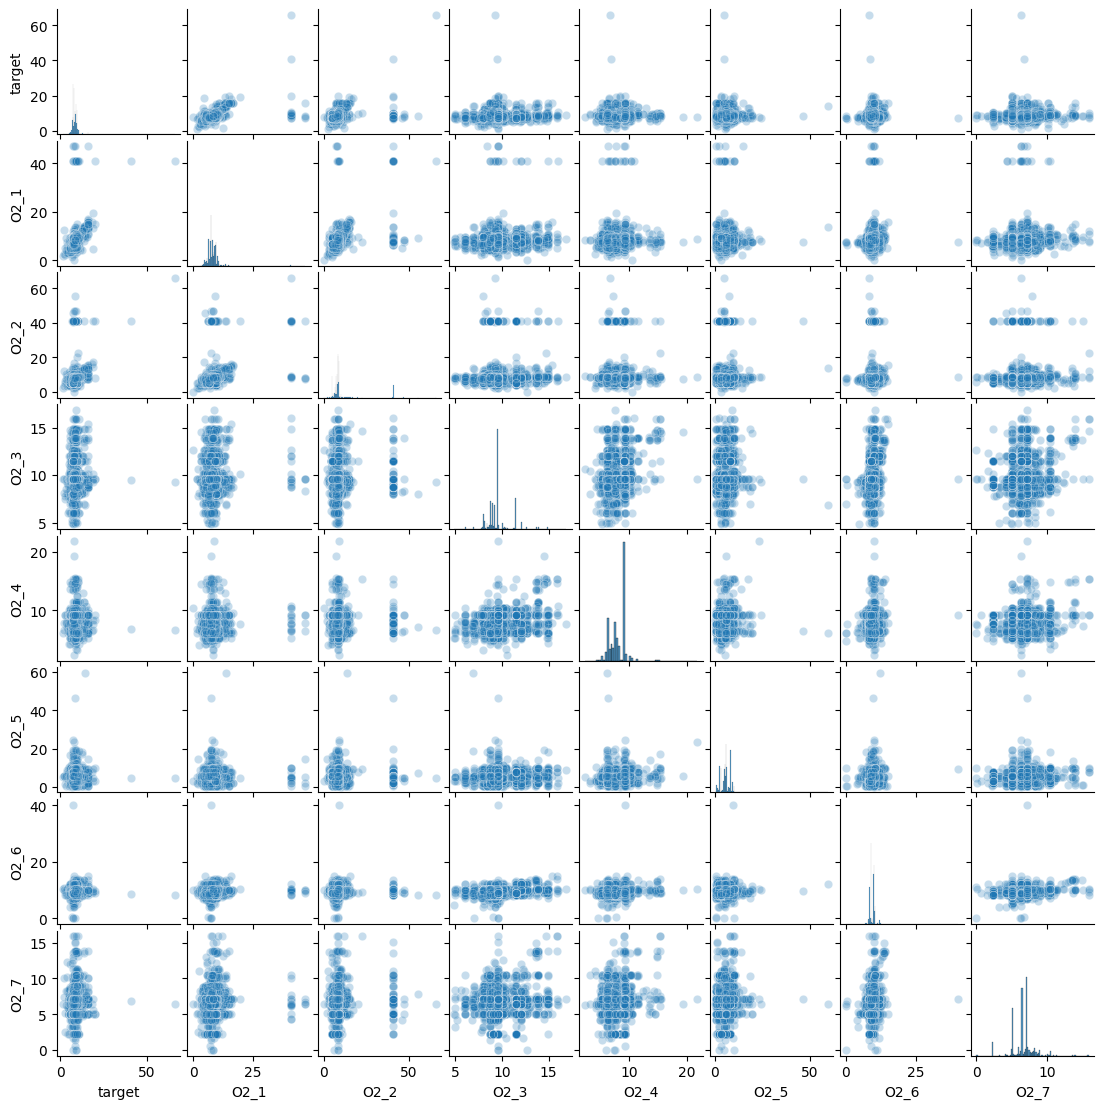

In [14]:
fig=sns.pairplot(train_df[['target','O2_1', 'O2_2', 'O2_3', 'O2_4','O2_5','O2_6','O2_7']], kind='scatter',plot_kws={'alpha':0.25})
fig.fig.set_size_inches(11,11)
plt.show()

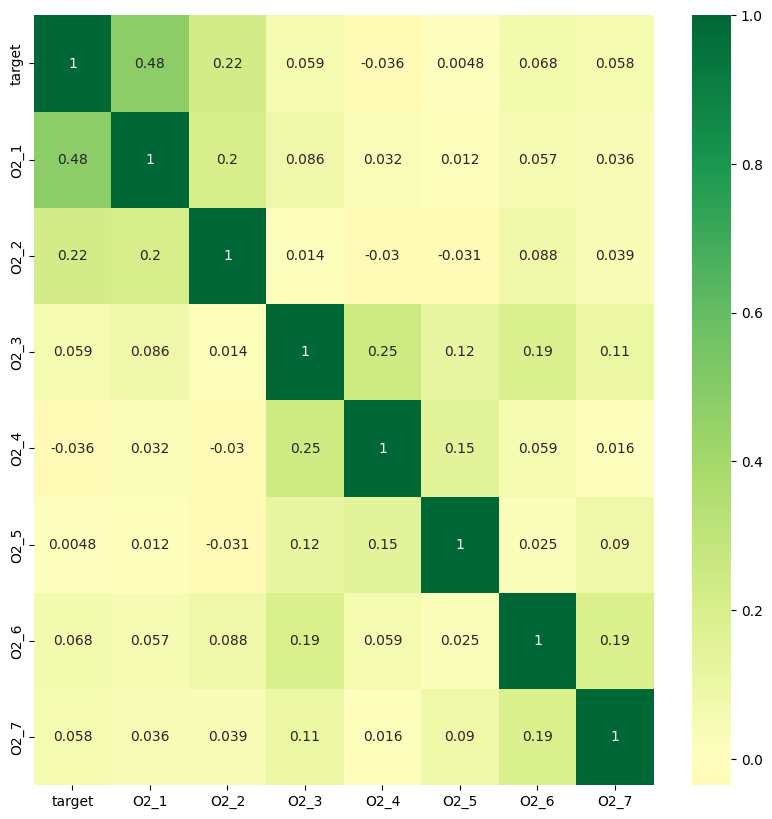

In [15]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(train_df[['target','O2_1', 'O2_2', 'O2_3', 'O2_4','O2_5','O2_6','O2_7']].corr(),xticklabels=train_df[['target','O2_1', 'O2_2', 'O2_3', 'O2_4','O2_5','O2_6','O2_7']].corr().columns,
               yticklabels=train_df[['target','O2_1', 'O2_2', 'O2_3', 'O2_4','O2_5','O2_6','O2_7']].corr().columns,cmap='RdYlGn',center=0,annot=True)
plt.show()

The highest correlation occurs between the target and O2_2 and O2_1 values.

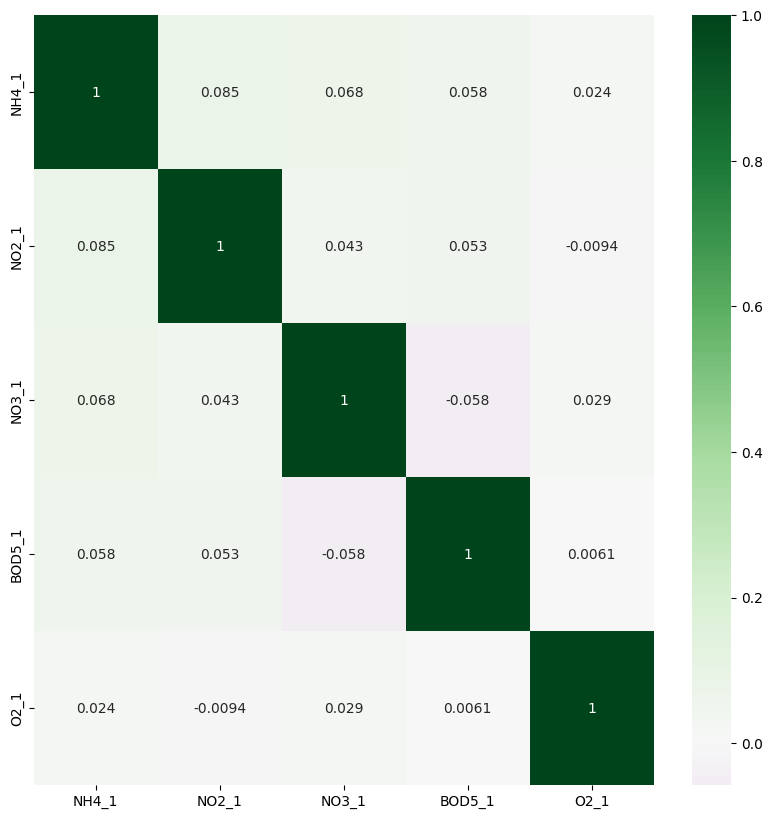

In [16]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(train_df[['NH4_1','NO2_1','NO3_1','BOD5_1','O2_1']].corr(),xticklabels=train_df[['NH4_1','NO2_1','NO3_1','BOD5_1','O2_1']].corr().columns,
               yticklabels=train_df[['NH4_1','NO2_1','NO3_1','BOD5_1','O2_1']].corr().columns,cmap='PRGn',center=0,annot=True)
plt.show()

It seems that the highest correlations with the O2_1 display NO3_1 and NH4_1.

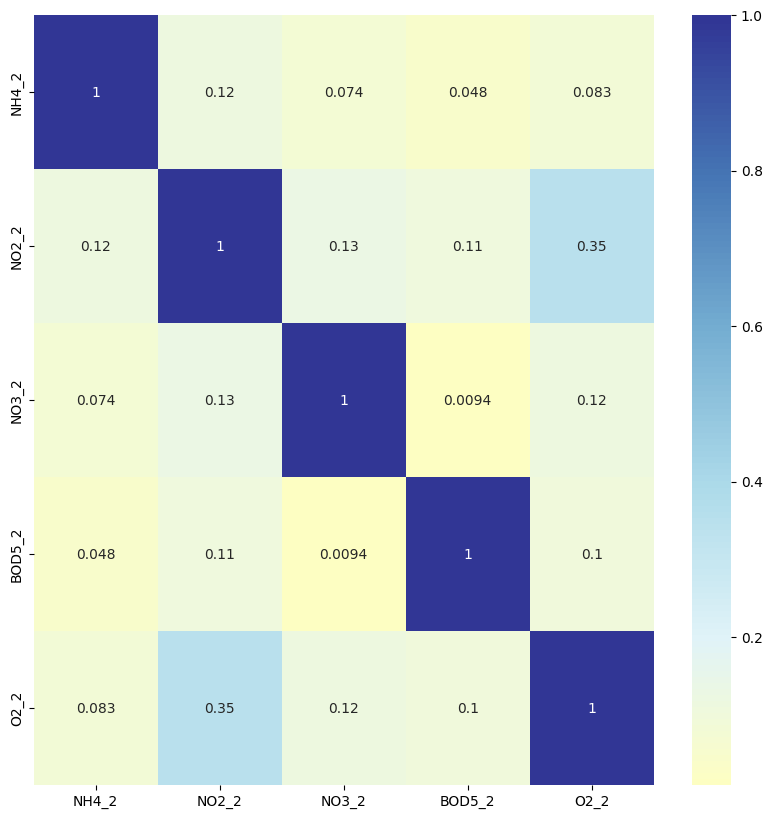

In [17]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(train_df[['NH4_2','NO2_2','NO3_2','BOD5_2','O2_2']].corr(),xticklabels=train_df[['NH4_2','NO2_2','NO3_2','BOD5_2','O2_2']].corr().columns,
               yticklabels=train_df[['NH4_2','NO2_2','NO3_2','BOD5_2','O2_2']].corr().columns,cmap='RdYlBu',center=0,annot=True)
plt.show()

The highest correlation with the O2_2 values show NO2_2, but the other features show quite high correlation. Let's leave all these features, train the model, assess it and then decide if any features should be left.

In [18]:
train_v1=train_df.copy()
train_v1.drop(columns=['NH4_3','NO2_3','NO3_3','BOD5_3','NH4_4','NO2_4','NO3_4','BOD5_4','NH4_5','NO2_5','NO3_5','BOD5_5','NH4_6','NO2_6','NO3_6','BOD5_6','O2_3','O2_4','O2_5','O2_6','O2_7','NO2_1','BOD5_1','NH4_7','NO2_7','NO3_7','BOD5_7'],inplace=True)
train_v1

,id,target,O2_1,O2_2,NH4_1,NH4_2,NO2_2,NO3_1,NO3_2,BOD5_2
0,0,8.59,7.500,9.000,0.180,0.200,0.050,0.400,1.500,3.150
1,1,9.10,13.533,40.900,1.107,1.027,1.360,2.347,5.105,6.950
2,2,8.21,3.710,5.420,0.020,0.020,0.050,1.700,1.700,4.950
3,3,8.39,8.700,8.100,0.280,0.270,0.050,1.500,1.500,4.700
4,4,8.07,8.050,8.650,0.360,0.435,0.115,1.050,1.150,4.970
...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,0.565,0.565,0.052,1.235,0.210,4.100
3496,3496,8.09,6.630,6.630,1.300,2.200,0.020,1.700,1.620,3.150
3497,3497,9.95,8.367,8.433,0.430,0.400,0.033,2.103,1.620,4.833
3498,3498,9.52,10.000,6.630,0.300,0.200,0.470,1.040,0.550,5.400


In [20]:
train_v1.drop(columns=['id'],inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

X=train_v1.drop(["target"],axis=1)
y=train_v1["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

reg_score=reg.score(X_train,y_train)
print("Train R2 score: ",reg_score)

reg.fit(X_test,y_test)
reg_score_test=reg.score(X_test,y_test)
print("Test R2 score: ",reg_score_test)


Train R2 score:  0.9048102834990484
Test R2 score:  0.9145439914204997


In [32]:
predict_train=reg.predict(X_train)
predict_test=reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Train MAE: ", mean_absolute_error(y_train,predict_train))
print("Test MAE: ", mean_absolute_error(y_test,predict_test))

print("Train RMSE: ", sqrt(mean_squared_error(y_train,predict_train)))
print("Test RMSE: ", sqrt(mean_squared_error(y_test,predict_test)))
      

Train MAE:  0.7977690078717202
Test MAE:  0.29857277006802674
Train RMSE:  1.6604978544539013
Test RMSE:  0.45832368548783164


All metrics look good, but let's experiment with dropping 'NH4_2'.

In [37]:
train_v2=train_v1.copy()
train_v2.drop(columns=['NH4_2'],inplace=True)
train_v2

,target,O2_1,O2_2,NH4_1,NO2_2,NO3_1,NO3_2,BOD5_2
0,8.59,7.500,9.000,0.180,0.050,0.400,1.500,3.150
1,9.10,13.533,40.900,1.107,1.360,2.347,5.105,6.950
2,8.21,3.710,5.420,0.020,0.050,1.700,1.700,4.950
3,8.39,8.700,8.100,0.280,0.050,1.500,1.500,4.700
4,8.07,8.050,8.650,0.360,0.115,1.050,1.150,4.970
...,...,...,...,...,...,...,...,...
3495,8.08,6.250,8.300,0.565,0.052,1.235,0.210,4.100
3496,8.09,6.630,6.630,1.300,0.020,1.700,1.620,3.150
3497,9.95,8.367,8.433,0.430,0.033,2.103,1.620,4.833
3498,9.52,10.000,6.630,0.300,0.470,1.040,0.550,5.400


In [38]:
X2=train_v2.drop(["target"],axis=1)
y2=train_v2["target"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

reg=RandomForestRegressor()
reg.fit(X2_train,y2_train)

reg_score=reg.score(X2_train,y2_train)
print("Train R2 score: ",reg_score)

reg.fit(X2_test,y2_test)
reg_score_test=reg.score(X2_test,y2_test)
print("Test R2 score: ",reg_score_test)

predict_train2=reg.predict(X2_train)
predict_test2=reg.predict(X2_test)

print("Train MAE: ", mean_absolute_error(y2_train,predict_train2))
print("Test MAE: ", mean_absolute_error(y2_test,predict_test2))

print("Train RMSE: ", sqrt(mean_squared_error(y2_train,predict_train2)))
print("Test RMSE: ", sqrt(mean_squared_error(y2_test,predict_test2)))
      

Train R2 score:  0.9257700596371148
Test R2 score:  0.9182362079316574
Train MAE:  0.8013753508260447
Test MAE:  0.2959006414965982
Train RMSE:  1.6731190108977814
Test RMSE:  0.4483131852077686


All metrics look good, but let's experiment with dropping 'BOD5_2'.

In [44]:
train_v3=train_v1.copy()
train_v3.drop(columns=['BOD5_2','NH4_2'],inplace=True)
train_v3

,target,O2_1,O2_2,NH4_1,NO2_2,NO3_1,NO3_2
0,8.59,7.500,9.000,0.180,0.050,0.400,1.500
1,9.10,13.533,40.900,1.107,1.360,2.347,5.105
2,8.21,3.710,5.420,0.020,0.050,1.700,1.700
3,8.39,8.700,8.100,0.280,0.050,1.500,1.500
4,8.07,8.050,8.650,0.360,0.115,1.050,1.150
...,...,...,...,...,...,...,...
3495,8.08,6.250,8.300,0.565,0.052,1.235,0.210
3496,8.09,6.630,6.630,1.300,0.020,1.700,1.620
3497,9.95,8.367,8.433,0.430,0.033,2.103,1.620
3498,9.52,10.000,6.630,0.300,0.470,1.040,0.550


In [45]:
X3=train_v3.drop(["target"],axis=1)
y3=train_v3["target"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

reg=RandomForestRegressor()
reg.fit(X3_train,y3_train)

reg_score=reg.score(X3_train,y3_train)
print("Train R2 score: ",reg_score)

reg.fit(X3_test,y3_test)
reg_score_test=reg.score(X3_test,y3_test)
print("Test R2 score: ",reg_score_test)

predict_train3=reg.predict(X3_train)
predict_test3=reg.predict(X3_test)

print("Train MAE: ", mean_absolute_error(y3_train,predict_train3))
print("Test MAE: ", mean_absolute_error(y3_test,predict_test3))

print("Train RMSE: ", sqrt(mean_squared_error(y3_train,predict_train3)))
print("Test RMSE: ", sqrt(mean_squared_error(y3_test,predict_test3)))
      

Train R2 score:  0.9246674620044151
Test R2 score:  0.9144943013770293
Train MAE:  0.8015517996112731
Test MAE:  0.298310672562358
Train RMSE:  1.678579565497738
Test RMSE:  0.45845691669405536


All metrics look good, but let's experiment with dropping one more feature 'NO3_2'.

In [43]:
train_v4=train_v1.copy()
train_v4.drop(columns=['BOD5_2','NH4_2','NO3_2'],inplace=True)
train_v4

,target,O2_1,O2_2,NH4_1,NO2_2,NO3_1
0,8.59,7.500,9.000,0.180,0.050,0.400
1,9.10,13.533,40.900,1.107,1.360,2.347
2,8.21,3.710,5.420,0.020,0.050,1.700
3,8.39,8.700,8.100,0.280,0.050,1.500
4,8.07,8.050,8.650,0.360,0.115,1.050
...,...,...,...,...,...,...
3495,8.08,6.250,8.300,0.565,0.052,1.235
3496,8.09,6.630,6.630,1.300,0.020,1.700
3497,9.95,8.367,8.433,0.430,0.033,2.103
3498,9.52,10.000,6.630,0.300,0.470,1.040


In [46]:
X4=train_v4.drop(["target"],axis=1)
y4=train_v4["target"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

reg=RandomForestRegressor()
reg.fit(X4_train,y4_train)

reg_score=reg.score(X4_train,y4_train)
print("Train R2 score: ",reg_score)

reg.fit(X4_test,y4_test)
reg_score_test=reg.score(X4_test,y4_test)
print("Test R2 score: ",reg_score_test)

predict_train4=reg.predict(X4_train)
predict_test4=reg.predict(X4_test)

print("Train MAE: ", mean_absolute_error(y4_train,predict_train4))
print("Test MAE: ", mean_absolute_error(y4_test,predict_test4))

print("Train RMSE: ", sqrt(mean_squared_error(y4_train,predict_train4)))
print("Test RMSE: ", sqrt(mean_squared_error(y4_test,predict_test4)))


Train R2 score:  0.910941904524868
Test R2 score:  0.9111841203701218
Train MAE:  0.8095534661807581
Test MAE:  0.3048118231292512
Train RMSE:  1.6670338210557165
Test RMSE:  0.46724677242074925


The best results are obtained with version 1.

In [50]:
train_df['NH4_3']=0
features=['NO2_3','NO3_3','BOD5_3','NH4_4','NO2_4','NO3_4','BOD5_4','NH4_5','NO2_5','NO3_5','BOD5_5','NH4_6','NO2_6','NO3_6','BOD5_6','O2_3','O2_4','O2_5','O2_6','O2_7','NO2_1','BOD5_1','NH4_7','NO2_7','NO3_7','BOD5_7']
for f in features:
    train_df[f]=0
train_df

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,0,0,0,0.180,0.200,0,0,0,0,0,0,0.050,0,0,0,0,0,0.400,1.500,0,0,0,0,0,0,3.150,0,0,0,0,0
1,1,9.10,13.533,40.900,0,0,0,0,0,1.107,1.027,0,0,0,0,0,0,1.360,0,0,0,0,0,2.347,5.105,0,0,0,0,0,0,6.950,0,0,0,0,0
2,2,8.21,3.710,5.420,0,0,0,0,0,0.020,0.020,0,0,0,0,0,0,0.050,0,0,0,0,0,1.700,1.700,0,0,0,0,0,0,4.950,0,0,0,0,0
3,3,8.39,8.700,8.100,0,0,0,0,0,0.280,0.270,0,0,0,0,0,0,0.050,0,0,0,0,0,1.500,1.500,0,0,0,0,0,0,4.700,0,0,0,0,0
4,4,8.07,8.050,8.650,0,0,0,0,0,0.360,0.435,0,0,0,0,0,0,0.115,0,0,0,0,0,1.050,1.150,0,0,0,0,0,0,4.970,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,0,0,0,0,0,0.565,0.565,0,0,0,0,0,0,0.052,0,0,0,0,0,1.235,0.210,0,0,0,0,0,0,4.100,0,0,0,0,0
3496,3496,8.09,6.630,6.630,0,0,0,0,0,1.300,2.200,0,0,0,0,0,0,0.020,0,0,0,0,0,1.700,1.620,0,0,0,0,0,0,3.150,0,0,0,0,0
3497,3497,9.95,8.367,8.433,0,0,0,0,0,0.430,0.400,0,0,0,0,0,0,0.033,0,0,0,0,0,2.103,1.620,0,0,0,0,0,0,4.833,0,0,0,0,0
3498,3498,9.52,10.000,6.630,0,0,0,0,0,0.300,0.200,0,0,0,0,0,0,0.470,0,0,0,0,0,1.040,0.550,0,0,0,0,0,0,5.400,0,0,0,0,0


In [51]:
train_df.isnull().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [52]:
train_df.to_csv('C:/Users/pfali/Downloads/playground-series-s3e21/submission.csv', index=False)